## CASE STUDY ASSIGNMENT 7 - Final Case Classifier

#### Team: Nicole Wittlin, Joe Schueder, Steven Hayden and Kevin Mendonsa

# Introduction

Classify the Column Labeled ‘y’
Features are labeled x0 through x49
Deliverable:
Minimize my dollar cost on an UNKNOWN dataset
 * Each False Positive costs 10 Dollars 
 * Each False Negative costs 500 Dollars 
 * True Positives and True Negatives cost 0 Dollars 


Paper Framework

Introduction
EDA
    High Cardinality
    Correlation
    Missing Data
    Data classes
    Outliers
    Normality
    
 Assumptions before cleaning etc.
 
 Data Cleanup - Renaming values, reclassifying continuous to categorical, imputation or drop out
 
 Data Prep for Modeling:
 STandardization - MinMax scaling
 One-hot Encoding
 Sampling strategy
 
 Baseline Model
 
 Feature Importance
 
 Recursive feature extraction (Dimensionality Reduction - Occams's Razor)
 
 Cross Validation
 
 Parameter Tuning
 
 Multiple models - Diversity (models selected and why)
 
 Ensembling
 
 Error Metrics - ROC-AUC, F1 etc.
 
 Confusion Matrices
 
 Cost/Benefits Matrix - Tranlate into business terms/discovery

Paper Framework
·        Introduction
·        EDA
o   High Cardinality
o   Correlation
o   Missing Data classes
o   Outliers
o   Normality
·        Assumptions before cleaning etc.
·        Data Cleanup –
o   Renaming values,
o   Reclassifying continuous to categorical,
o   Imputation or drop out
·        Data Prep for Modeling:
o   Standardization - MinMax scaling
o   One-hot Encoding
o   Sampling strategy
·        Baseline Model
·        Feature Importance
·        Recursive feature extraction (Dimensionality Reduction - Occams's Razor)
·        Cross Validation
·        Parameter Tuning
·        Multiple models - Diversity (models selected and why)
·        Ensembling
·        Error Metrics - ROC-AUC, F1 etc.
·        Confusion Matrices
·        Cost/Benefits Matrix - Translate into business terms/discovery
 

# Preprocessing

Importing the data from a CSV file provided using Pandas. Followed by some basic data exploration to determine number of rows, columns and data types. 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('final_project.csv')
#df = pd.read_csv(r'C:\Users\jjschued\Documents\SMU\7333 QTW\final_project.csv')

In [4]:
df.columns

Index(['x0', 'x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10',
       'x11', 'x12', 'x13', 'x14', 'x15', 'x16', 'x17', 'x18', 'x19', 'x20',
       'x21', 'x22', 'x23', 'x24', 'x25', 'x26', 'x27', 'x28', 'x29', 'x30',
       'x31', 'x32', 'x33', 'x34', 'x35', 'x36', 'x37', 'x38', 'x39', 'x40',
       'x41', 'x42', 'x43', 'x44', 'x45', 'x46', 'x47', 'x48', 'x49', 'y'],
      dtype='object')

In [5]:
df.head()

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x41,x42,x43,x44,x45,x46,x47,x48,x49,y
0,-0.166563,-3.961588,4.621113,2.481908,-1.800135,0.804684,6.718751,-14.789997,-1.040673,-4.204950,...,-1.497117,5.414063,-2.325655,1.674827,-0.264332,60.781427,-7.689696,0.151589,-8.040166,0
1,-0.149894,-0.585676,27.839856,4.152333,6.426802,-2.426943,40.477058,-6.725709,0.896421,0.330165,...,36.292790,4.490915,0.762561,6.526662,1.007927,15.805696,-4.896678,-0.320283,16.719974,0
2,-0.321707,-1.429819,12.251561,6.586874,-5.304647,-11.311090,17.812850,11.060572,5.325880,-2.632984,...,-0.368491,9.088864,-0.689886,-2.731118,0.754200,30.856417,-7.428573,-2.090804,-7.869421,0
3,-0.245594,5.076677,-24.149632,3.637307,6.505811,2.290224,-35.111751,-18.913592,-0.337041,-5.568076,...,15.691546,-7.467775,2.940789,-6.424112,0.419776,-72.424569,5.361375,1.806070,-7.670847,0
4,-0.273366,0.306326,-11.352593,1.676758,2.928441,-0.616824,-16.505817,27.532281,1.199715,-4.309105,...,-13.911297,-5.229937,1.783928,3.957801,-0.096988,-14.085435,-0.208351,-0.894942,15.724742,1


In [6]:
df['x24']

0         euorpe
1           asia
2           asia
3           asia
4           asia
           ...  
159995      asia
159996      asia
159997      asia
159998      asia
159999      asia
Name: x24, Length: 160000, dtype: object

In [7]:
# Clean-up classes for consistency
df['x24'] = df['x24'].replace(['asia', 'euorpe','america'], ['Asia', 'Europe','America'])
df['x29'] = df['x29'].replace(['sept.', 'January','Dev','July'], ['Sept', 'Jan','Dec','Jul'])
df['x30'] = df['x30'].replace(['monday', 'tuesday','wednesday','thursday','friday'], ['mon', 'tue','wed','thu','fri'])

In [8]:
df.x24.value_counts()

Asia       138965
Europe      16538
America      4469
Name: x24, dtype: int64

In [9]:
df['x29']

0         Jul
1         Aug
2         Jul
3         Jul
4         Jul
         ... 
159995    Aug
159996    May
159997    Jun
159998    May
159999    Aug
Name: x29, Length: 160000, dtype: object

In [10]:
df.x29.value_counts()

Jul     45569
Jun     41329
Aug     29406
May     21939
Sept    10819
Apr      6761
Oct      2407
Mar      1231
Nov       337
Feb       140
Dec        23
Jan         9
Name: x29, dtype: int64

In [11]:
df['x30']

0         tue
1         wed
2         wed
3         wed
4         tue
         ... 
159995    wed
159996    wed
159997    wed
159998    wed
159999    tue
Name: x30, Length: 160000, dtype: object

In [12]:
df.x30.value_counts()

wed        101535
thurday     29429
tue         27954
fri           564
mon           488
Name: x30, dtype: int64

In [13]:
df['x32']

0           0.0%
1         -0.02%
2         -0.01%
3          0.01%
4          0.01%
           ...  
159995      0.0%
159996    -0.01%
159997     -0.0%
159998    -0.02%
159999     0.02%
Name: x32, Length: 160000, dtype: object

In [14]:
df['x32'] = df['x32'].str.rstrip('%').astype('float') / 100.0

In [15]:
df['x32']

0         0.0000
1        -0.0002
2        -0.0001
3         0.0001
4         0.0001
           ...  
159995    0.0000
159996   -0.0001
159997   -0.0000
159998   -0.0002
159999    0.0002
Name: x32, Length: 160000, dtype: float64

In [16]:
df['x37']

0          $1313.96
1          $1962.78
2           $430.47
3         $-2366.29
4          $-620.66
            ...    
159995     $-891.96
159996     $1588.65
159997      $687.46
159998      $439.21
159999    $-1229.34
Name: x37, Length: 160000, dtype: object

In [17]:
df['x37'] = df['x37'].replace({'\$': '', ',': ''}, regex=True).astype(float)

In [18]:
df['x37']

0         1313.96
1         1962.78
2          430.47
3        -2366.29
4         -620.66
           ...   
159995    -891.96
159996    1588.65
159997     687.46
159998     439.21
159999   -1229.34
Name: x37, Length: 160000, dtype: float64

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 160000 entries, 0 to 159999
Data columns (total 51 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   x0      159974 non-null  float64
 1   x1      159975 non-null  float64
 2   x2      159962 non-null  float64
 3   x3      159963 non-null  float64
 4   x4      159974 non-null  float64
 5   x5      159963 non-null  float64
 6   x6      159974 non-null  float64
 7   x7      159973 non-null  float64
 8   x8      159979 non-null  float64
 9   x9      159970 non-null  float64
 10  x10     159957 non-null  float64
 11  x11     159970 non-null  float64
 12  x12     159964 non-null  float64
 13  x13     159969 non-null  float64
 14  x14     159966 non-null  float64
 15  x15     159965 non-null  float64
 16  x16     159974 non-null  float64
 17  x17     159973 non-null  float64
 18  x18     159960 non-null  float64
 19  x19     159965 non-null  float64
 20  x20     159962 non-null  float64
 21  x21     15

# Exploratory Data Analysis
The team was given dataset of 150,000 rows and 51 columns. 

In [20]:
df.describe()

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x41,x42,x43,x44,x45,x46,x47,x48,x49,y
count,159974.000000,159975.000000,159962.000000,159963.000000,159974.000000,159963.000000,159974.000000,159973.000000,159979.000000,159970.000000,...,159960.000000,159974.000000,159963.000000,159960.000000,159971.000000,159969.000000,159963.000000,159968.000000,159968.000000,160000.000000
mean,-0.001028,0.001358,-1.150145,-0.024637,-0.000549,0.013582,-1.670670,-7.692795,-0.030540,0.005462,...,6.701076,-1.833820,-0.002091,-0.006250,0.000885,-12.755395,0.028622,-0.000224,-0.674224,0.401231
std,0.371137,6.340632,13.273480,8.065032,6.382293,7.670076,19.298665,30.542264,8.901185,6.355040,...,18.680196,5.110705,1.534952,4.164595,0.396621,36.608641,4.788157,1.935501,15.036738,0.490149
min,-1.592635,-26.278302,-59.394048,-35.476594,-28.467536,-33.822988,-86.354483,-181.506976,-37.691045,-27.980659,...,-82.167224,-27.933750,-6.876234,-17.983487,-1.753221,-201.826828,-21.086333,-8.490155,-65.791191,0.000000
25%,-0.251641,-4.260973,-10.166536,-5.454438,-4.313118,-5.148130,-14.780146,-27.324771,-6.031058,-4.260619,...,-5.804080,-5.162869,-1.039677,-2.812055,-0.266518,-36.428329,-3.216016,-1.320800,-10.931753,0.000000
50%,-0.002047,0.004813,-1.340932,-0.031408,0.000857,0.014118,-1.948594,-6.956789,-0.016840,0.006045,...,6.840110,-1.923754,-0.004385,-0.010484,0.001645,-12.982497,0.035865,-0.011993,-0.574410,0.000000
75%,0.248532,4.284220,7.871676,5.445179,4.306660,5.190749,11.446931,12.217071,5.972349,4.305734,...,19.266367,1.453507,1.033275,2.783274,0.269049,11.445443,3.268028,1.317703,9.651072,1.000000
max,1.600849,27.988178,63.545653,38.906025,26.247812,35.550110,92.390605,149.150634,39.049831,27.377842,...,100.050432,22.668041,6.680922,19.069759,1.669205,150.859415,20.836854,8.226552,66.877604,1.000000


## Missing Data

About 158,392 of the 160,000 has no missing data. This means there is around one perent of the data missing.  The stakeholder has informed the team that values that are missing are missing completely at random.  Since there is a low prevalence of missing values we chose to delete any records with missing values.  Since we chose to delete the rows with missing values, we note that doing so means no future records could be predicted if missing values are present . 

In [21]:
# Missing Data Summary
df.isnull().sum()

x0     26
x1     25
x2     38
x3     37
x4     26
x5     37
x6     26
x7     27
x8     21
x9     30
x10    43
x11    30
x12    36
x13    31
x14    34
x15    35
x16    26
x17    27
x18    40
x19    35
x20    38
x21    29
x22    27
x23    47
x24    28
x25    22
x26    36
x27    30
x28    35
x29    30
x30    30
x31    39
x32    31
x33    41
x34    41
x35    30
x36    27
x37    23
x38    31
x39    23
x40    36
x41    40
x42    26
x43    37
x44    40
x45    29
x46    31
x47    37
x48    32
x49    32
y       0
dtype: int64

In [22]:
# Drop all rows containing NaN values from the data frame

drop_nan_df = df.dropna()
df.dropna(inplace=True)

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 158392 entries, 0 to 159999
Data columns (total 51 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   x0      158392 non-null  float64
 1   x1      158392 non-null  float64
 2   x2      158392 non-null  float64
 3   x3      158392 non-null  float64
 4   x4      158392 non-null  float64
 5   x5      158392 non-null  float64
 6   x6      158392 non-null  float64
 7   x7      158392 non-null  float64
 8   x8      158392 non-null  float64
 9   x9      158392 non-null  float64
 10  x10     158392 non-null  float64
 11  x11     158392 non-null  float64
 12  x12     158392 non-null  float64
 13  x13     158392 non-null  float64
 14  x14     158392 non-null  float64
 15  x15     158392 non-null  float64
 16  x16     158392 non-null  float64
 17  x17     158392 non-null  float64
 18  x18     158392 non-null  float64
 19  x19     158392 non-null  float64
 20  x20     158392 non-null  float64
 21  x21     15

In [24]:
drop_nan_df.isnull().sum()

x0     0
x1     0
x2     0
x3     0
x4     0
x5     0
x6     0
x7     0
x8     0
x9     0
x10    0
x11    0
x12    0
x13    0
x14    0
x15    0
x16    0
x17    0
x18    0
x19    0
x20    0
x21    0
x22    0
x23    0
x24    0
x25    0
x26    0
x27    0
x28    0
x29    0
x30    0
x31    0
x32    0
x33    0
x34    0
x35    0
x36    0
x37    0
x38    0
x39    0
x40    0
x41    0
x42    0
x43    0
x44    0
x45    0
x46    0
x47    0
x48    0
x49    0
y      0
dtype: int64

In [25]:
drop_nan_df.info

<bound method DataFrame.info of               x0        x1         x2         x3        x4         x5  \
0      -0.166563 -3.961588   4.621113   2.481908 -1.800135   0.804684   
1      -0.149894 -0.585676  27.839856   4.152333  6.426802  -2.426943   
2      -0.321707 -1.429819  12.251561   6.586874 -5.304647 -11.311090   
3      -0.245594  5.076677 -24.149632   3.637307  6.505811   2.290224   
4      -0.273366  0.306326 -11.352593   1.676758  2.928441  -0.616824   
...          ...       ...        ...        ...       ...        ...   
159995 -0.487024 -4.270269   0.417395  -1.992423  1.757552  -1.167819   
159996  0.825477  4.804368  22.161535  11.371303  1.715901   6.990759   
159997 -0.802489  5.362696   7.243419  -7.496074  2.295250  -2.756067   
159998  0.339237  7.609895   5.368414  -2.825481  4.046102  15.322603   
159999 -0.296748 -0.412773 -10.911407  -5.633629 -4.028154  15.939428   

               x6         x7         x8        x9  ...        x41       x42  \
0        6.7

Looking at the distribution of outcomes in our data_final dataset, we can see that 0 almost 60% of the data in our set, the outcome 1 makes up 40%. When we run our classifier, we will need to be careful to account for the slightly unbalanced nature of our classifiers to help ensure we aren't overclassifying the majority labels.

In [26]:
#balance of data between 0 and 1 outcome
df['y'].value_counts()/len(df)*100

0    59.88055
1    40.11945
Name: y, dtype: float64

## Correlation Matrices

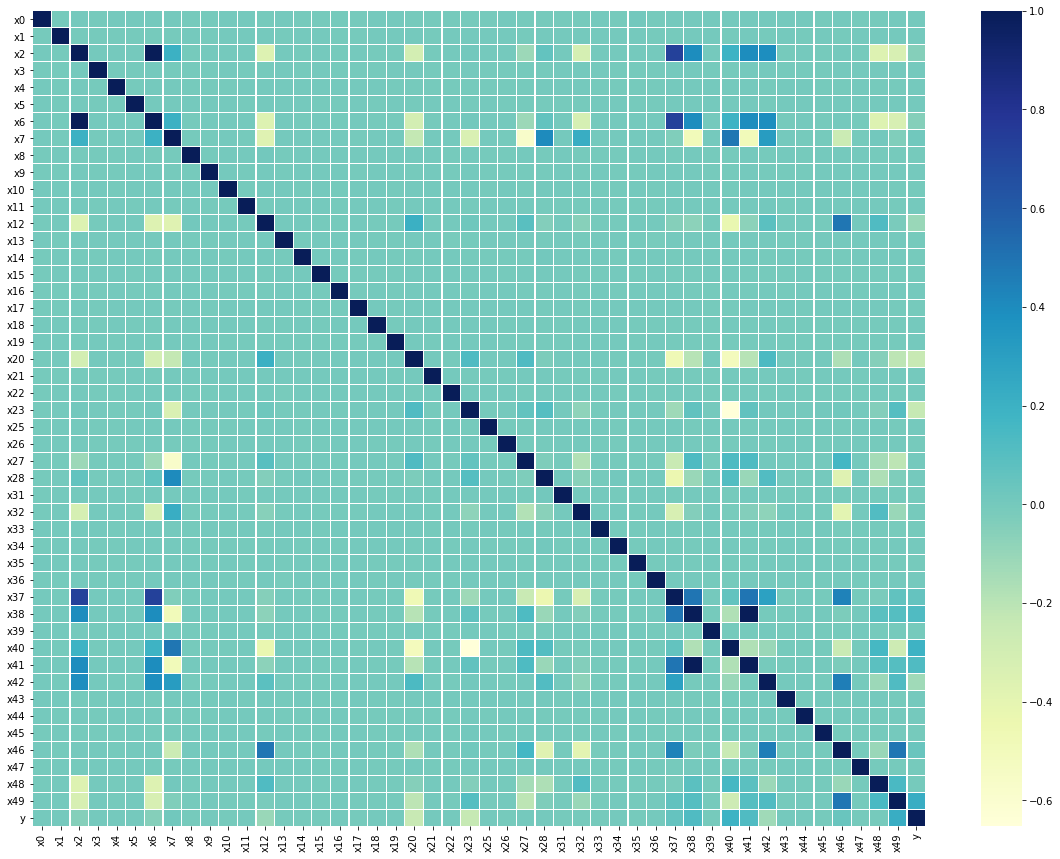

In [27]:
corrmat = drop_nan_df.corr() 
  
f, ax = plt.subplots(figsize =(20, 15)) 
sns.heatmap(corrmat, ax = ax, cmap ="YlGnBu", linewidths = 0.1)

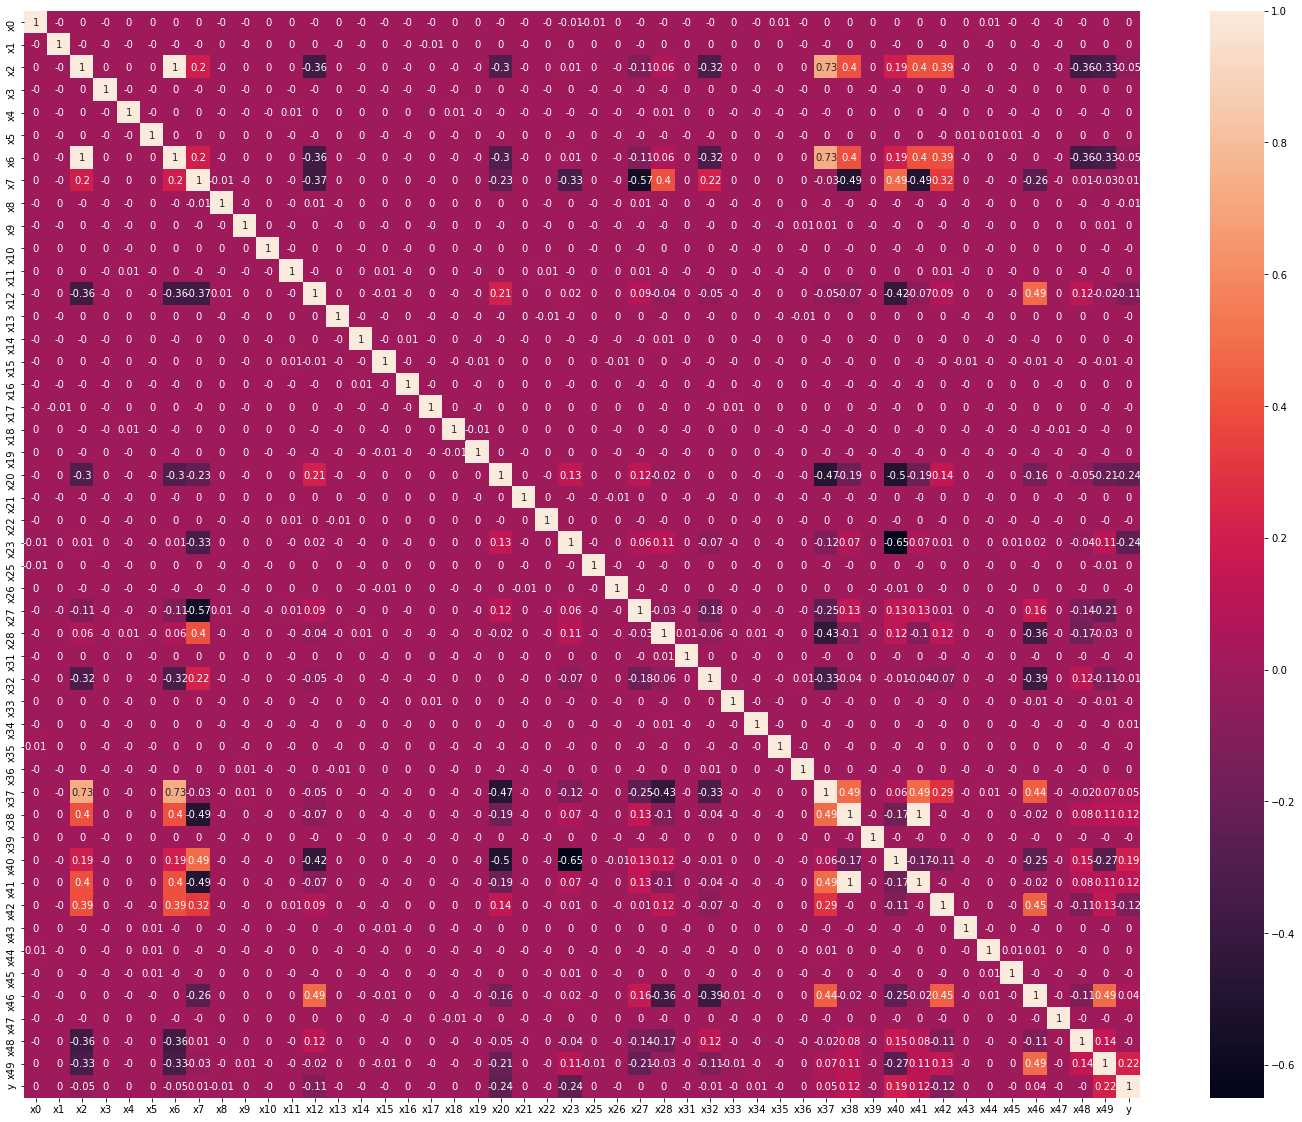

In [28]:
correlation_matrix = drop_nan_df.corr().round(2)
plt.figure(figsize = (25,20))
# annot = True to print the values inside the square
sns.heatmap(data=correlation_matrix, annot=True)

[Text(0, 0, 'x0'),
 Text(0, 0, 'x1'),
 Text(0, 0, 'x2'),
 Text(0, 0, 'x3'),
 Text(0, 0, 'x4'),
 Text(0, 0, 'x5'),
 Text(0, 0, 'x6'),
 Text(0, 0, 'x7'),
 Text(0, 0, 'x8'),
 Text(0, 0, 'x9'),
 Text(0, 0, 'x10'),
 Text(0, 0, 'x11'),
 Text(0, 0, 'x12'),
 Text(0, 0, 'x13'),
 Text(0, 0, 'x14'),
 Text(0, 0, 'x15'),
 Text(0, 0, 'x16'),
 Text(0, 0, 'x17'),
 Text(0, 0, 'x18'),
 Text(0, 0, 'x19'),
 Text(0, 0, 'x20'),
 Text(0, 0, 'x21'),
 Text(0, 0, 'x22'),
 Text(0, 0, 'x23'),
 Text(0, 0, 'x25'),
 Text(0, 0, 'x26'),
 Text(0, 0, 'x27'),
 Text(0, 0, 'x28'),
 Text(0, 0, 'x31'),
 Text(0, 0, 'x32'),
 Text(0, 0, 'x33'),
 Text(0, 0, 'x34'),
 Text(0, 0, 'x35'),
 Text(0, 0, 'x36'),
 Text(0, 0, 'x37'),
 Text(0, 0, 'x38'),
 Text(0, 0, 'x39'),
 Text(0, 0, 'x40'),
 Text(0, 0, 'x41'),
 Text(0, 0, 'x42'),
 Text(0, 0, 'x43'),
 Text(0, 0, 'x44'),
 Text(0, 0, 'x45'),
 Text(0, 0, 'x46'),
 Text(0, 0, 'x47'),
 Text(0, 0, 'x48'),
 Text(0, 0, 'x49'),
 Text(0, 0, 'y')]

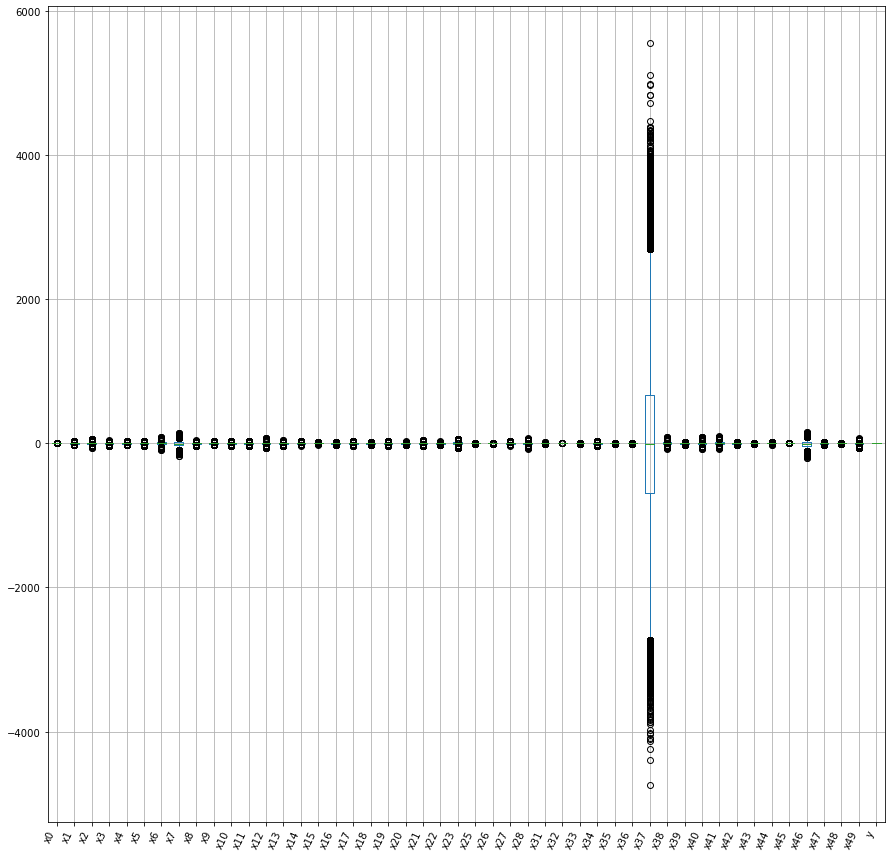

In [35]:
#boxplot of all the variables
plt.figure(figsize=(15, 15))
ax = drop_nan_df.boxplot()
ax.set_xticklabels(ax.get_xticklabels(), rotation=65, horizontalalignment='right')

## Pandas Profile (mini)

In [36]:
from pandas_profiling import ProfileReport

In [37]:
#profFull = ProfileReport(df)
#profFull.to_file(output_file='output.html')

In [39]:
profileMin = ProfileReport(drop_nan_df, minimal=True)
profileMin.to_notebook_iframe()
#profileMin.to_file(output_file="output_min.html")

In [35]:
#prof1000 = ProfileReport(df.sample(n=1000)) 
#prof1000.to_file(output_file='output.html')
#vars = {'cat': {'check_composition' : False}}

In [36]:
# how to make pair plots....or is dataset too large

## One Hot Encode of Day, Month, Country

In [37]:
onehot1 = pd.get_dummies(drop_nan_df.x24, prefix='Country')
onehot1.head()

,Country_America,Country_Asia,Country_Europe
0,0,0,1
1,0,1,0
2,0,1,0
3,0,1,0
4,0,1,0


In [38]:
dataMergeoh1 = pd.concat([drop_nan_df, onehot1], axis=1)
dataMergeoh1.head()

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x44,x45,x46,x47,x48,x49,y,Country_America,Country_Asia,Country_Europe
0,-0.166563,-3.961588,4.621113,2.481908,-1.800135,0.804684,6.718751,-14.789997,-1.040673,-4.204950,...,1.674827,-0.264332,60.781427,-7.689696,0.151589,-8.040166,0,0,0,1
1,-0.149894,-0.585676,27.839856,4.152333,6.426802,-2.426943,40.477058,-6.725709,0.896421,0.330165,...,6.526662,1.007927,15.805696,-4.896678,-0.320283,16.719974,0,0,1,0
2,-0.321707,-1.429819,12.251561,6.586874,-5.304647,-11.311090,17.812850,11.060572,5.325880,-2.632984,...,-2.731118,0.754200,30.856417,-7.428573,-2.090804,-7.869421,0,0,1,0
3,-0.245594,5.076677,-24.149632,3.637307,6.505811,2.290224,-35.111751,-18.913592,-0.337041,-5.568076,...,-6.424112,0.419776,-72.424569,5.361375,1.806070,-7.670847,0,0,1,0
4,-0.273366,0.306326,-11.352593,1.676758,2.928441,-0.616824,-16.505817,27.532281,1.199715,-4.309105,...,3.957801,-0.096988,-14.085435,-0.208351,-0.894942,15.724742,1,0,1,0


In [39]:
onehot2 = pd.get_dummies(dataMergeoh1.x29, prefix='Month')
onehot2.head()

,Month_Apr,Month_Aug,Month_Dec,Month_Feb,Month_Jan,Month_Jul,Month_Jun,Month_Mar,Month_May,Month_Nov,Month_Oct,Month_Sept
0,0,0,0,0,0,1,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,1,0,0,0,0,0,0
3,0,0,0,0,0,1,0,0,0,0,0,0
4,0,0,0,0,0,1,0,0,0,0,0,0


In [40]:
dataMergeoh2 = pd.concat([dataMergeoh1, onehot2], axis=1)
dataMergeoh2.head()

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,Month_Dec,Month_Feb,Month_Jan,Month_Jul,Month_Jun,Month_Mar,Month_May,Month_Nov,Month_Oct,Month_Sept
0,-0.166563,-3.961588,4.621113,2.481908,-1.800135,0.804684,6.718751,-14.789997,-1.040673,-4.204950,...,0,0,0,1,0,0,0,0,0,0
1,-0.149894,-0.585676,27.839856,4.152333,6.426802,-2.426943,40.477058,-6.725709,0.896421,0.330165,...,0,0,0,0,0,0,0,0,0,0
2,-0.321707,-1.429819,12.251561,6.586874,-5.304647,-11.311090,17.812850,11.060572,5.325880,-2.632984,...,0,0,0,1,0,0,0,0,0,0
3,-0.245594,5.076677,-24.149632,3.637307,6.505811,2.290224,-35.111751,-18.913592,-0.337041,-5.568076,...,0,0,0,1,0,0,0,0,0,0
4,-0.273366,0.306326,-11.352593,1.676758,2.928441,-0.616824,-16.505817,27.532281,1.199715,-4.309105,...,0,0,0,1,0,0,0,0,0,0


In [41]:
onehot3 = pd.get_dummies(dataMergeoh2.x30, prefix='Day')
onehot3.head()

,Day_fri,Day_mon,Day_thurday,Day_tue,Day_wed
0,0,0,0,1,0
1,0,0,0,0,1
2,0,0,0,0,1
3,0,0,0,0,1
4,0,0,0,1,0


In [42]:
clean_data = pd.concat([dataMergeoh2, onehot3], axis=1)
clean_data.head()

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,Month_Mar,Month_May,Month_Nov,Month_Oct,Month_Sept,Day_fri,Day_mon,Day_thurday,Day_tue,Day_wed
0,-0.166563,-3.961588,4.621113,2.481908,-1.800135,0.804684,6.718751,-14.789997,-1.040673,-4.204950,...,0,0,0,0,0,0,0,0,1,0
1,-0.149894,-0.585676,27.839856,4.152333,6.426802,-2.426943,40.477058,-6.725709,0.896421,0.330165,...,0,0,0,0,0,0,0,0,0,1
2,-0.321707,-1.429819,12.251561,6.586874,-5.304647,-11.311090,17.812850,11.060572,5.325880,-2.632984,...,0,0,0,0,0,0,0,0,0,1
3,-0.245594,5.076677,-24.149632,3.637307,6.505811,2.290224,-35.111751,-18.913592,-0.337041,-5.568076,...,0,0,0,0,0,0,0,0,0,1
4,-0.273366,0.306326,-11.352593,1.676758,2.928441,-0.616824,-16.505817,27.532281,1.199715,-4.309105,...,0,0,0,0,0,0,0,0,1,0


In [43]:
clean_data = clean_data.drop(['x24', 'x29', 'x30'], axis=1)
clean_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 158392 entries, 0 to 159999
Data columns (total 68 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   x0               158392 non-null  float64
 1   x1               158392 non-null  float64
 2   x2               158392 non-null  float64
 3   x3               158392 non-null  float64
 4   x4               158392 non-null  float64
 5   x5               158392 non-null  float64
 6   x6               158392 non-null  float64
 7   x7               158392 non-null  float64
 8   x8               158392 non-null  float64
 9   x9               158392 non-null  float64
 10  x10              158392 non-null  float64
 11  x11              158392 non-null  float64
 12  x12              158392 non-null  float64
 13  x13              158392 non-null  float64
 14  x14              158392 non-null  float64
 15  x15              158392 non-null  float64
 16  x16              158392 non-null  floa

In [44]:
clean_data.describe()

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,Month_Mar,Month_May,Month_Nov,Month_Oct,Month_Sept,Day_fri,Day_mon,Day_thurday,Day_tue,Day_wed
count,158392.000000,158392.000000,158392.000000,158392.000000,158392.000000,158392.000000,158392.000000,158392.000000,158392.000000,158392.000000,...,158392.000000,158392.000000,158392.000000,158392.000000,158392.000000,158392.000000,158392.000000,158392.000000,158392.000000,158392.000000
mean,-0.000808,0.003705,-1.148314,-0.023012,-0.000266,0.013282,-1.669562,-7.697877,-0.028853,0.004320,...,0.007709,0.137052,0.002090,0.015058,0.067806,0.003510,0.003056,0.184125,0.174819,0.634489
std,0.371064,6.340297,13.274738,8.066624,6.383306,7.672102,19.300472,30.541562,8.904048,6.354359,...,0.087461,0.343904,0.045666,0.121782,0.251414,0.059144,0.055194,0.387588,0.379814,0.481575
min,-1.592635,-26.278302,-59.394048,-33.864827,-28.467536,-33.822988,-86.354483,-181.506976,-37.691045,-27.980659,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-0.251246,-4.259016,-10.166609,-5.453044,-4.313987,-5.152419,-14.781485,-27.315875,-6.034094,-4.260304,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,-0.001818,0.010023,-1.342199,-0.028470,-0.001138,0.015135,-1.951457,-6.959275,-0.016173,0.003098,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,0.248622,4.286606,7.878130,5.448332,4.308644,5.191172,11.454209,12.215119,5.978646,4.303807,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.600849,27.988178,63.545653,38.906025,26.247812,35.550110,92.390605,149.150634,39.049831,27.377842,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Modeling Analysis

## Random Forest

In [45]:
print("The shape of our data is:", clean_data.shape)

The shape of our data is: (158392, 68)


In [46]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [47]:
X = clean_data.drop('y', axis=1)
y = clean_data['y']

We think that it is appropriate to transformour data, so we should get minimal outlier skew, and we will have an aggredate score of accuracy, precision and recall based on different groupings of the data.

In [48]:
# implementing train-test-split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=83)



from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

#This makes our model's coefficients take on the same scale for accurate feature importance analysis
#Notice we scaled the data before the cross validation
X_train_scl = scaler.transform(X_train)

scaler.fit(X_test)
X_test_scl = scaler.transform(X_test)

In [58]:
from sklearn.ensemble import RandomForestClassifier

# random forest model creation
rfc = RandomForestClassifier()
rfc.fit(X_train_scl,y_train)

# predictions
rfc_predict = rfc.predict(X_test_scl)

C:\ProgramData\Anaconda3\envs\ML7331\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [47]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix

In [48]:
print("=== Confusion Matrix ===")
print(confusion_matrix(y_test, rfc_predict))
print('\n')
print("=== Classification Report ===")
print(classification_report(y_test, rfc_predict))
print('\n')

=== Confusion Matrix ===
[[18079   875]
 [ 2448 10277]]


=== Classification Report ===
              precision    recall  f1-score   support

           0       0.88      0.95      0.92     18954
           1       0.92      0.81      0.86     12725

   micro avg       0.90      0.90      0.90     31679
   macro avg       0.90      0.88      0.89     31679
weighted avg       0.90      0.90      0.89     31679





In [59]:
rfc.score(X_test_scl, y_test)

0.8901164809495249

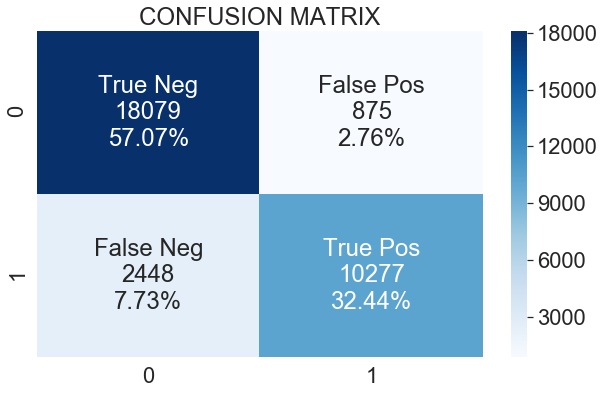

In [54]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, auc, roc_curve
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict

conf = confusion_matrix(y_test, rfc_predict)

plt.figure(figsize=(10, 6))
sns.set(font_scale=2)
plt.title('CONFUSION MATRIX')
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                conf.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     conf.flatten()/np.sum(conf)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(conf, annot=labels, fmt='', cmap='Blues')

In [49]:
rfc_cv_score = cross_val_score(rfc, X, y, cv = 3, scoring='roc_auc')

In [50]:
print("=== All AUC Scores ===")
print(rfc_cv_score)
print('\n')
print("=== Mean AUC Score ===")
print("Mean AUC Score - Random Forest: ", rfc_cv_score.mean())

=== All AUC Scores ===
[0.9510841  0.95566385 0.94922568]


=== Mean AUC Score ===
Mean AUC Score - Random Forest:  0.9519912103614865


In [62]:
ylist = y_test.values.astype('int64')
ylist
ybinary = label_binarize(ylist, classes=[0, 1])
y_score = label_binarize(rfc_predict, classes=[0, 1])

In [64]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp
from sklearn.metrics import roc_auc_score

n_classes = 1
#X1_train, X1_test, y1_train, y1_test
#y_score = classifier.fit(X_train3, y_train3).decision_function(X_test3)
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(ybinary[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(ybinary.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

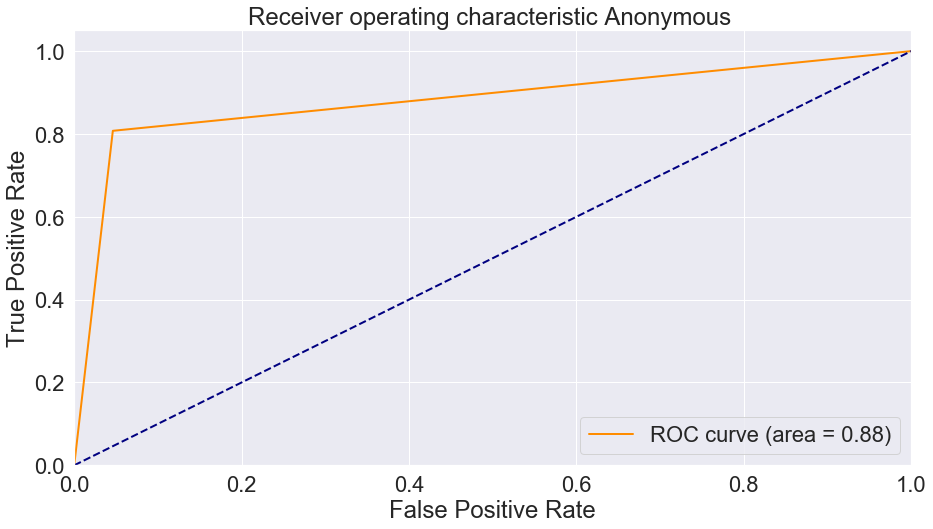

In [65]:
plt.figure(figsize=(15,8))

lw = 2
plt.plot(fpr[0], tpr[0], color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[0])
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic Anonymous ')
plt.legend(loc="lower right")
plt.show()

## Feature Importance

In [ ]:
# Merge field names and feature importance to display them together
fi = pd.DataFrame(rfc.feature_importances_, columns =['featimp'])
featuresnames = pd.DataFrame(X_test.columns.values.tolist(), columns =['fields'])

featimpdf = pd.merge(featuresnames, fi, left_index=True, right_index=True)
featimpdf = featimpdf.sort_values(by='featimp', ascending=False)
featimpdf.head()

[Text(0, 0, 'x23'),
 Text(0, 0, 'x20'),
 Text(0, 0, 'x48'),
 Text(0, 0, 'x49'),
 Text(0, 0, 'x42'),
 Text(0, 0, 'x27'),
 Text(0, 0, 'x12'),
 Text(0, 0, 'x37'),
 Text(0, 0, 'x28'),
 Text(0, 0, 'x40'),
 Text(0, 0, 'x46'),
 Text(0, 0, 'x7'),
 Text(0, 0, 'x6'),
 Text(0, 0, 'x38'),
 Text(0, 0, 'x41'),
 Text(0, 0, 'x32'),
 Text(0, 0, 'x2'),
 Text(0, 0, 'x5'),
 Text(0, 0, 'x18'),
 Text(0, 0, 'x3'),
 Text(0, 0, 'x8'),
 Text(0, 0, 'x22'),
 Text(0, 0, 'x19'),
 Text(0, 0, 'x11'),
 Text(0, 0, 'x16'),
 Text(0, 0, 'x33'),
 Text(0, 0, 'x36'),
 Text(0, 0, 'x17'),
 Text(0, 0, 'x45'),
 Text(0, 0, 'x31'),
 Text(0, 0, 'x14'),
 Text(0, 0, 'x1'),
 Text(0, 0, 'x0'),
 Text(0, 0, 'x39'),
 Text(0, 0, 'x25'),
 Text(0, 0, 'x4'),
 Text(0, 0, 'x13'),
 Text(0, 0, 'x15'),
 Text(0, 0, 'x44'),
 Text(0, 0, 'x47'),
 Text(0, 0, 'x9'),
 Text(0, 0, 'x35'),
 Text(0, 0, 'x26'),
 Text(0, 0, 'x34'),
 Text(0, 0, 'x10'),
 Text(0, 0, 'x43'),
 Text(0, 0, 'x21'),
 Text(0, 0, 'Country_Europe'),
 Text(0, 0, 'Country_Asia'),
 Text(0, 0

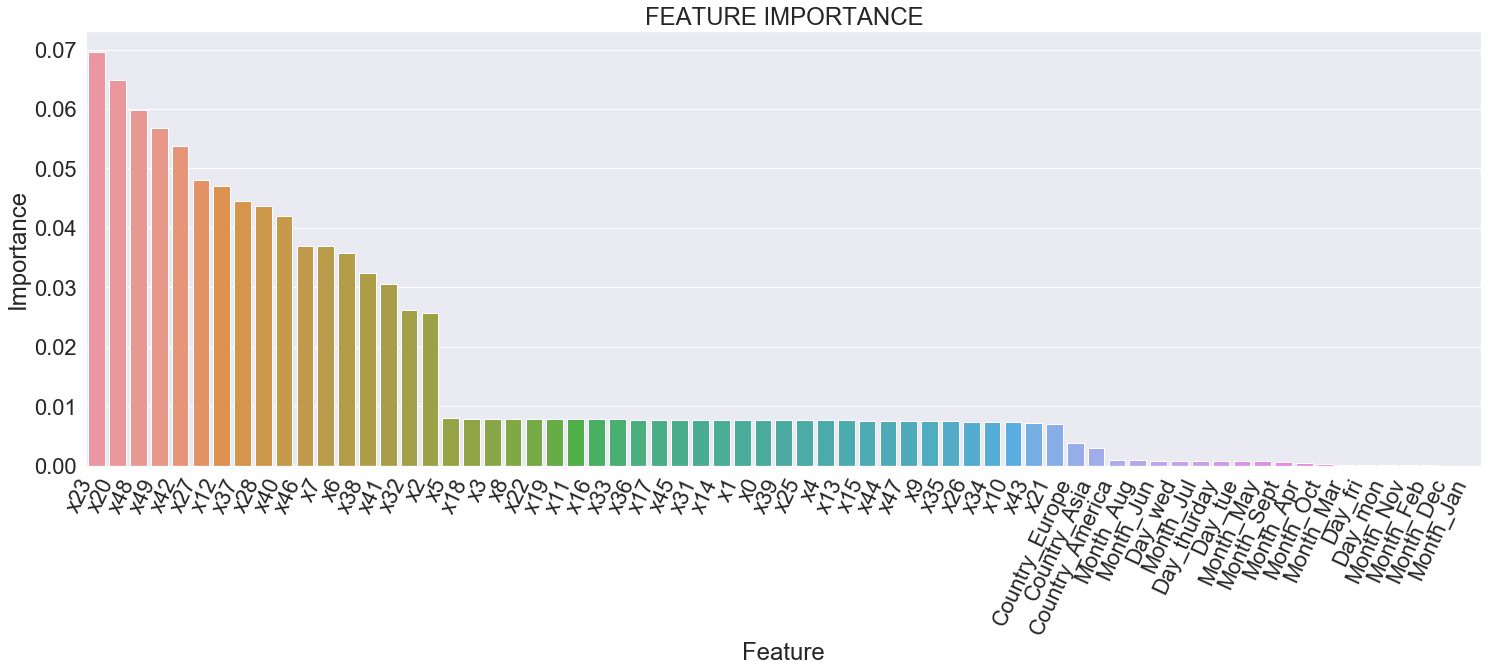

In [70]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(25,8))
ax = sns.barplot(x=featimpdf.fields, y=featimpdf.featimp)
ax.set_title('FEATURE IMPORTANCE')
plt.xlabel("Feature")
plt.ylabel("Importance")
ax.set_xticklabels(ax.get_xticklabels(), rotation=65, horizontalalignment='right')

XGSBOOST

In [53]:
from sklearn.ensemble import GradientBoostingClassifier
clf = GradientBoostingClassifier(random_state=101)
clf.fit(X_train_scl, y_train)
GradientBoostingClassifier(random_state=101)
clf.predict(X_test)

clf.score(X_test_scl, y_test)

0.8431453013037028

TENSOR FLOW

In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals

try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass
import tensorflow as tf

from tensorflow.keras import layers
from tensorflow.keras import regularizers

print(tf.__version__)

2.3.0


In [54]:
N_VALIDATION = int(1e3)
N_TRAIN = int(1e4)
BUFFER_SIZE = int(1e4)
BATCH_SIZE = 100
STEPS_PER_EPOCH = N_TRAIN//BATCH_SIZE

#def schedule( lr):
#   if lr > 0.000001:
#       return float(lr)
#   else:
#       return float(0.000001)

    
# learning rate schedule
def schedule(epoch,lr):
    initial_learning_rate=0.05
    decay = 0.0000002
    decay_steps= float(STEPS_PER_EPOCH*1000)
    if lr > 0.000001:
        LearningRate = initial_learning_rate / (1 + decay * epoch/ decay_steps)  
        print(epoch)              
        return float(LearningRate)
    else:
        LearningRate=float(0.000001)
        print(epoch)
        return LearningRate
    
   
    
def get_callbacks():
    
  return [
#    tfdocs.modeling.EpochDots(),
    tf.keras.callbacks.EarlyStopping(monitor='val_binary_crossentropy', min_delta = 0.00001, mode = 'min', patience=10),
    tf.keras.callbacks.LearningRateScheduler(schedule)
  ]

In [55]:
def get_optimizer():
    
  return tf.keras.optimizers.SGD(learning_rate=0.05,momentum=0.90, decay = 0.0000002, nesterov=True)

In [71]:
#The learning rate decayed by a factor of 1.0000002 every batch update until it reached a minimum of 10^−6,

def define_predictor():
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Dense(300, kernel_initializer = tf.keras.initializers.RandomNormal(mean=0.0, stddev=0.1, seed=None), input_shape= X_train.shape[1:], activation='relu')) # Hidden 1
    model.add(layers.Dropout(0.5))
    model.add(tf.keras.layers.Dense(300,kernel_initializer = tf.keras.initializers.RandomNormal(mean=0.0, stddev=0.05, seed=None), activation='relu')) # Hidden 2
    model.add(tf.keras.layers.Dense(300,kernel_initializer = tf.keras.initializers.RandomNormal(mean=0.0, stddev=0.05, seed=None), activation='relu')) # Hidden 3
    model.add(tf.keras.layers.Dense(300,kernel_initializer = tf.keras.initializers.RandomNormal(mean=0.0, stddev=0.05, seed=None), activation='relu')) # Hidden 4
    model.add(tf.keras.layers.Dense(300,kernel_initializer = tf.keras.initializers.RandomNormal(mean=0.0, stddev=0.05, seed=None), activation='relu')) # Hidden 5
    model.add(tf.keras.layers.Dense(1,kernel_initializer = tf.keras.initializers.RandomNormal(mean=0.0, stddev=0.001, seed=None),activation='sigmoid')) # Output #1.2
    #model.add(tf.keras.layers.Dense(1,activation='softmax')) # Output
    #sgd = tf.keras.optimizers.SGD(lr=.05, decay = 1.0000002, momentum=0.99)
    model.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                  optimizer='adam' , 
                  metrics=['accuracy', 
                            tf.keras.losses.BinaryCrossentropy(
                            from_logits=True, name='val_binary_crossentropy'), 
                            tf.keras.metrics.AUC()])
    return model

In [ ]:
Att_model = define_predictor()
history = Att_model.fit(X_train_scl,
                        np.array(y_train),
                        callbacks=get_callbacks(),
                        verbose=2, 
#                        steps_per_epoch = 5, 
                        epochs=50, 
                        batch_size=BATCH_SIZE,
                        validation_data =  ( X_test_scl, y_test ))

0
Epoch 1/50
1268/1268 - 7s - loss: 0.8178 - accuracy: 0.5976 - val_binary_crossentropy: 0.7522 - auc_1: 0.5179 - val_loss: 0.6740 - val_accuracy: 0.5983 - val_val_binary_crossentropy: 0.7505 - val_auc_1: 0.5000
1
Epoch 2/50
1268/1268 - 7s - loss: 0.8506 - accuracy: 0.5988 - val_binary_crossentropy: 0.7529 - auc_1: 0.4991 - val_loss: 0.6741 - val_accuracy: 0.5983 - val_val_binary_crossentropy: 0.7555 - val_auc_1: 0.5000
2
Epoch 3/50
1268/1268 - 7s - loss: 0.6738 - accuracy: 0.5989 - val_binary_crossentropy: 0.7528 - auc_1: 0.5022 - val_loss: 0.6739 - val_accuracy: 0.5983 - val_val_binary_crossentropy: 0.7547 - val_auc_1: 0.5000
3
Epoch 4/50
1268/1268 - 7s - loss: 0.6739 - accuracy: 0.5989 - val_binary_crossentropy: 0.7528 - auc_1: 0.5015 - val_loss: 0.6737 - val_accuracy: 0.5983 - val_val_binary_crossentropy: 0.7519 - val_auc_1: 0.5000
4
Epoch 5/50
1268/1268 - 6s - loss: 0.6739 - accuracy: 0.5989 - val_binary_crossentropy: 0.7528 - auc_1: 0.5003 - val_loss: 0.6741 - val_accuracy: 0.598

In [ ]:
results = Att_model.evaluate(scaler.fit_transform(X_test),np.array(y_test), batch_size=100)

In [ ]:
predictions = Att_model.predict(X_test)

In [ ]:
preddf = pd.DataFrame(predictions)
preddf.head()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp
from sklearn.metrics import roc_auc_score

preddf['round'] = preddf.round(preddf[0])

yresultsround = preddf['round'].tolist()
yresultsround[2]
y_test.shape
#y_test[2]

ybinary = label_binarize(y_test, classes=[0,1])
y_score = label_binarize(yresultsround, classes=[0,1])

In [ ]:
import sklearn as sk
#Calculate the scores using the first model (replica)
 
scores_1 = Att_model.predict(scaler.fit_transform(X_test))

fpr, tpr, thresholds = sk.metrics.roc_curve(y_test, scores_1)

#Display the ROC score and plot
roc_auc = sk.metrics.roc_auc_score(y_test, scores_1)

print("AUC of ROC Curve:", roc_auc)
plt.plot(fpr, tpr)

plt.title("ROC Curve")

plt.xlabel("False Positive Rate")

plt.ylabel("True Positive Rate")

plt.show()

###  MODEL EVALUATION METRICS 

In order to evaluate the model, we reviewed several standard metrics, which are defined below. The aim is to maximize our precision, recall, and accuracy scores in our models.


The model had the following evaluation profile calcualated based on averages of the metrics by evaluating them on 10 times cross validation:  
 * Accuracy: 
 * Precsion: 
 * Recall: 
 * F1:   


* **Confusion Matrix** - The confusion matrix shows that this model categorized XX incorrectly as 1 when they were not and xx emails as 0 when they actually were 1.  


  
* **ACCURACY** - total number of correct predictions (True Positives/TP; True Negatives/TN) over total number of predictions made. <br>
Accuracy = (TP + TN)/(TP + FP + FN + TN)


* **PRECISION** - proportion of true positives over total number of positive outcomes, whether accurately predicted (TP) or inaccurately predicted (FP); helps illuminate which model is accurately picking correct classes or correctly classifying observations.<br>
Precision = (TP) / (TP + FP)


* **RECALL** - proportion of positive outcomes that were correctly classified by model; tells how many values were incorrectly predicted; a good pair with precision to determine if modeling is overfitting or selecting a single class; also known as sensitivity.  
Recall/Sensitivity = (TP) / (TP + FN) 


* **F1 SCORE** - measure of accuracy that accounts for true negatives and false positives.<br>
F1 score = 2(True Positive Rate * True Negatives)/(True Positives + True Negatives) 


We further plotted an **ROC curve** to visualize the Decision Tree's performance. An ROC curve, also known as a Reciever Operation Characteristic Curve, plots and compares classifiers based on the True Positive Rates (TPR) and False Positive Rates (FPR) for each classifier. An AUC (Area Under the Curve) score of 1.0 denotes a perfect classifier and an area of 0.5 represents a model which is no better than a random guess. Higher the AUC the better the classifier.

# Conclusion 